In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
import math
%matplotlib inline

C:\Users\inigo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\inigo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Part 1

## Exercise 1

Consider the data set below

In [7]:
data = np.array([4.04078064, -0.55665445, 3.05080334, 5.08400317, 2.72089663, 0.71922335, 0.95069126, 5.43223656, 3.50298766, -1.69666696, 0.16887197, 0.97921115, 4.81828023, 2.13361239, 2.31649532, 2.45398909, 2.95186638, 0.35927233, 1.53276119, 1.51244625, 2.05198596, -0.10338973, 2.18330019, 1.20449377, 1.77198419, 2.36079822, 4.24525693, 1.28167319, -0.4782344 , 2.15987517, 1.04436119, -3.31367483, 1.90677577, -1.52585791, 1.30861677, 3.92755598, 5.28340674, 2.46339939, 2.92340074, 6.86935904, 4.36460648, 4.31874289, 3.4310631 , 4.56743957, 1.89164429, 3.07432364, -1.09259307, 0.20645733, 1.9716586 , 0.48545271, 0.95117389, 1.17221689, 4.56967222, 1.00717303, 5.42222525, 3.16312747, 0.85955611, 2.1542952 , 3.32612246, 3.12462947, 0.4495974 , 1.6291549 , 1.31738387, 2.73270522, 0.40173961, 1.66718506, -2.60436878, 3.89440908, 2.06121341, 0.65197735, 5.40756812, 7.0944758 , 0.88894319, 0.96374457, -1.26270571, 2.19074211, 0.06566279, 2.01504511, 4.42887827, -0.71989433, 4.0375403 , 5.5868948 , 4.05289467, 1.25946927, -1.1316249 , -0.35446895, 6.1372851 , 0.14735692, 5.40410798, 5.33778763, 5.54798016, 3.39152955, 2.3835751 , 0.03465975, 0.81116816, 4.39280317, 1.85958392, 2.27926744, 1.51646355, 2.66025771])

Assume a Gaussian distribution for the data.
* Calculate maximum likelihood estimates for the paarmeters
* Visualize the data and the model

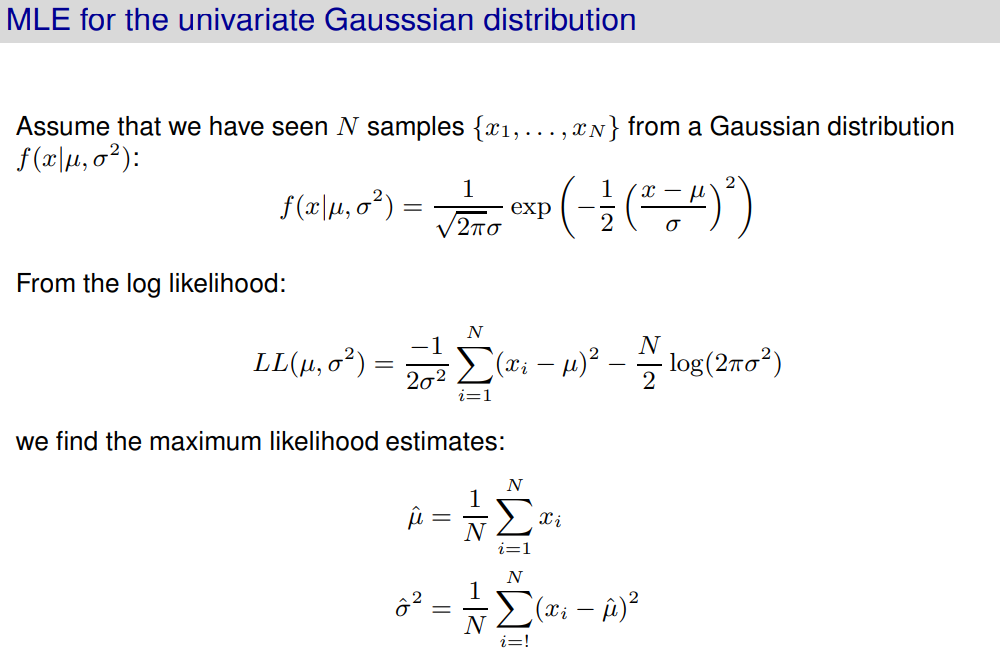

(array([0.01921571, 0.02882356, 0.05764713, 0.12490211, 0.20176495,
        0.20176495, 0.1056864 , 0.1056864 , 0.08647069, 0.02882356]),
 array([-3.31367483, -2.27285977, -1.2320447 , -0.19122964,  0.84958542,
         1.89040048,  2.93121555,  3.97203061,  5.01284567,  6.05366074,
         7.0944758 ]),
 <BarContainer object of 10 artists>)

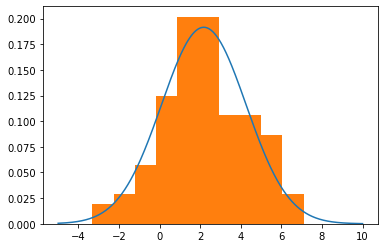

In [8]:
mu_hat = sum(data)/len(data)
sigma_hat = math.sqrt(sum((np.array(data) - mu_hat) ** 2) / len(data))
x = np.linspace(-5, 10, 1000)
y = norm.pdf(x,mu_hat, sigma_hat)
plt.plot(x,y)
plt.hist(data, density=True)

## Exercise 2 

Consider a poker game consisting of two rounds, and where each player is ini- tially dealt three cards. During the first round all three cards can be changed (FC), but during the second round at most two cards can be changed (SC). When deciding on whether to call or fold you can taken into account the number of cards changed by your opponent as well as your current hand (MH). After playing 20 games we have the results in Table 1, where BH shows who has the best hand.

In [10]:
df = pd.read_csv('poker_data.csv')
print(df)

      BH   MH  FC  SC
0     op   no   3   1
1     op   1a   2   1
2   draw   2v   1   1
3     me   2a   1   1
4   draw   fl   1   1
5     me   st   3   2
6     me   3v   1   1
7     me  sfl   1   0
8     op   no   0   0
9     op   1a   3   2
10  draw   2v   2   1
11    me   2v   3   2
12    op   2v   1   1
13    op   2v   3   0
14    me   2v   3   2
15  draw   no   3   2
16  draw   2v   1   1
17    op   fl   1   1
18    op   no   3   2
19    me   1a   3   2


* Construct a naive Bayes classifier for the poker domain. 
* Use the data cases to learn the maximum likelihood parameters in the model; if you feel comfortable with the estimation procedure, you only need to estimate the probabilities required for solving the exercise below. 
* What is the posterior distribution of BH given MH=1a, FC=1, and SC=1? 
* Do you see any potential issues with the posterior and how could you address it?

In [11]:
# Hint: You can calculate counts using, e.g.:
df[(df.FC==1) & (df.BH=='me')].shape[0]

3

In [14]:
df[(df.BH=='op') & (df.MH=='1a') & (df.FC==1) & (df.SC==1)].shape[0]

0

**Naive Bayes classifier:**

Class variable: BH

Class features: MH, FC, SC.

Naive Bayes classifier:

    BH
    
MH  FC  SC

In [23]:
# P ( BH | MH = 1a, FC = 1, SC = 1)
# = P(MH = 1a | BH) * P(FC = 1 | BH) * P(SC = 1 | BH) * P(BH)

BH_vals = ["me", "draw", "op"]
MH_BH = []
FC_BH = []
SC_BH = []
BH = []

# value count and probability estimation
for i in BH_vals:
    MH_BH.append(df[(df.MH=='1a') & (df.BH==i)].shape[0] / df[(df.BH == i)].shape[0])
    FC_BH.append(df[(df.FC==1) & (df.BH==i)].shape[0] / df[(df.BH == i)].shape[0])
    SC_BH.append(df[(df.SC==1) & (df.BH==i)].shape[0] / df[(df.BH == i)].shape[0])
    BH.append(df[(df.BH==i)].shape[0] / len(df))

# compute probability for each possible BH outcome
BH_res = []
for i in range(len(BH_vals)):
    BH_res.append(  MH_BH[i] * FC_BH[i] * SC_BH[i] * BH[i]  )

# normalize
res_tot = sum(BH_res)
for i in range(len(BH_res)):
    BH_res[i] = BH_res[i] / res_tot

print("Posterior distribution for BH: me = {}; draw = {}; op = {}".format(BH_res[0], BH_res[1], BH_res[2]))

Posterior distribution for BH: me = 0.32876712328767116; draw = 0.0; op = 0.6712328767123288


**Potential issue**: draw = 0, meaning that we can overfit and if we were to have a case in the test set where BH = draw and MH = 1a, FC = 1, SC = 1 then it'd be the worst possible fit for future data.

This can be resolved either with more data, or with parameter smoothing with pseudo-counts.

## Exercise 3

Perform one more iteration of the EM-algorithm in the example on Slide 23. You may consider using Python to calculate the required probabilities. 

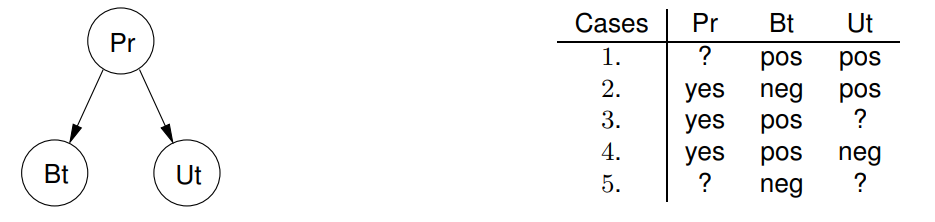

In [43]:
P_Pr = []
P_Ut_Pr = []
P_Bt_Pr = []

E_Pr = []
E_Ut_Pr = []
E_Bt_Pr = []

N = 5
Iterations = 5

# we fix Ut = y and Bt = y for simplicity.
# P(Pr = y) = N(Pr = y) / N
# P(Ut = y | Pr = y) = N(Ut = y, Pr = y) / N(Pr = y)
# P(Bt = y | Pr = y) = N(Bt = y, Pr = y) / N(Pr = y)

for i in range(Iterations):
    # Expectation
    if i == 0:
        P_Pr.append([0.5, 0.5]) # yes, no
        P_Ut_Pr.append([0.5, 0.5]) # P(Ut = pos | Pr)
        P_Bt_Pr.append([0.5, 0.5])
        
    E_Pr_y = P_Pr[len(P_Pr)-1][0] + 1 + 1 + 1 + P_Pr[len(P_Pr)-1][0]
    E_Pr_n = P_Pr[len(P_Pr)-1][1] + 0 + 0 + 0 + P_Pr[len(P_Pr)-1][1]
    E_Pr.append([E_Pr_y, E_Pr_n])
    
    # CAREFUL: Probability of Pr = {yes, no} AND Ut = YES!!!
    E_Ut_Pr_y = P_Pr[len(P_Pr)-1][0] + 1 + P_Ut_Pr[len(P_Ut_Pr)-1][0] + 0 + (P_Pr[len(P_Pr)-1][0] * P_Ut_Pr[len(P_Ut_Pr)-1][0])
    E_Ut_Pr_n = P_Pr[len(P_Pr)-1][1] + 0 + 0 + 0 + (P_Pr[len(P_Pr)-1][1] * P_Ut_Pr[len(P_Ut_Pr)-1][0])
    E_Ut_Pr.append([E_Ut_Pr_y, E_Ut_Pr_n])
    
    # E_Bt_Pr
    E_Bt_Pr_y = P_Pr[len(P_Pr)-1][0] + 0 + 1 + 1 + 0
    E_Bt_Pr_n = P_Pr[len(P_Pr)-1][1] + 0 + 0 + 0 + 0
    E_Bt_Pr.append([E_Bt_Pr_y, E_Bt_Pr_n])
    
    # Maximization
    P_Pr.append([E_Pr_y / N, E_Pr_n / N])
    P_Ut_Pr.append([E_Ut_Pr_y / E_Pr_y, E_Ut_Pr_n / E_Pr_n])
    P_Bt_Pr.append([E_Bt_Pr_y / E_Pr_y, E_Bt_Pr_n / E_Pr_n])

In [44]:
P_Pr

[[0.5, 0.5],
 [0.8, 0.2],
 [0.9199999999999999, 0.08],
 [0.968, 0.032],
 [0.9872, 0.0128],
 [0.99488, 0.00512]]

In [45]:
P_Ut_Pr

[[0.5, 0.5],
 [0.5625, 0.75],
 [0.6114130434782609, 0.78125],
 [0.6392382321236076, 0.8057065217391305],
 [0.6535698624026053, 0.8196191160618037],
 [0.6605769601492556, 0.8267849312013027]]

In [46]:
P_Bt_Pr

[[0.5, 0.5],
 [0.625, 0.5],
 [0.6086956521739131, 0.5],
 [0.6033057851239669, 0.5],
 [0.6012965964343598, 0.5],
 [0.6005146349308459, 0.5]]

## Exercise 4

In the thumbtack experiment, let the *unnormalized*
prior distribution for $\theta$ be

$$f(\theta) =
\begin{cases}
\theta\text{ if }\theta \le 1/2\\
(1-\theta)\text{ if }1/2\le \theta \le 1
\end{cases}
$$

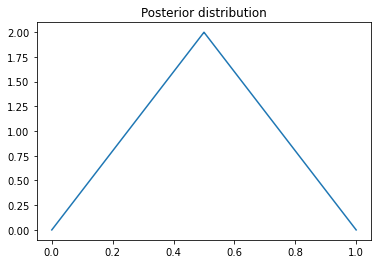

In [73]:
x = np.linspace(0,1,10000)
y = np.array([xp/.25 if xp <= 0.5 else (1-xp)/.25 for xp in x])
plt.plot(x,y)
plt.title("Posterior distribution")
plt.show()

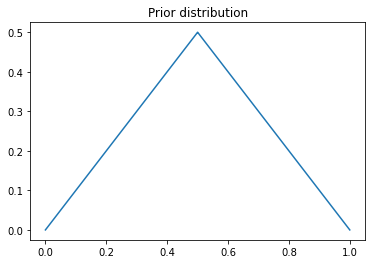

In [74]:
x = np.linspace(0,1,10000)
y = np.array([xp if xp <= 0.5 else (1-xp) for xp in x])
plt.plot(x,y)
plt.title("Prior distribution")
plt.show()

* What is the normalization constant for the prior distribution?
* Assume that we have performed one experiment resulting in $up$. What is now the posterior distribution for
$\theta$? Comparing your result with the prior distribution, do you see any challenges with the current model specification? 

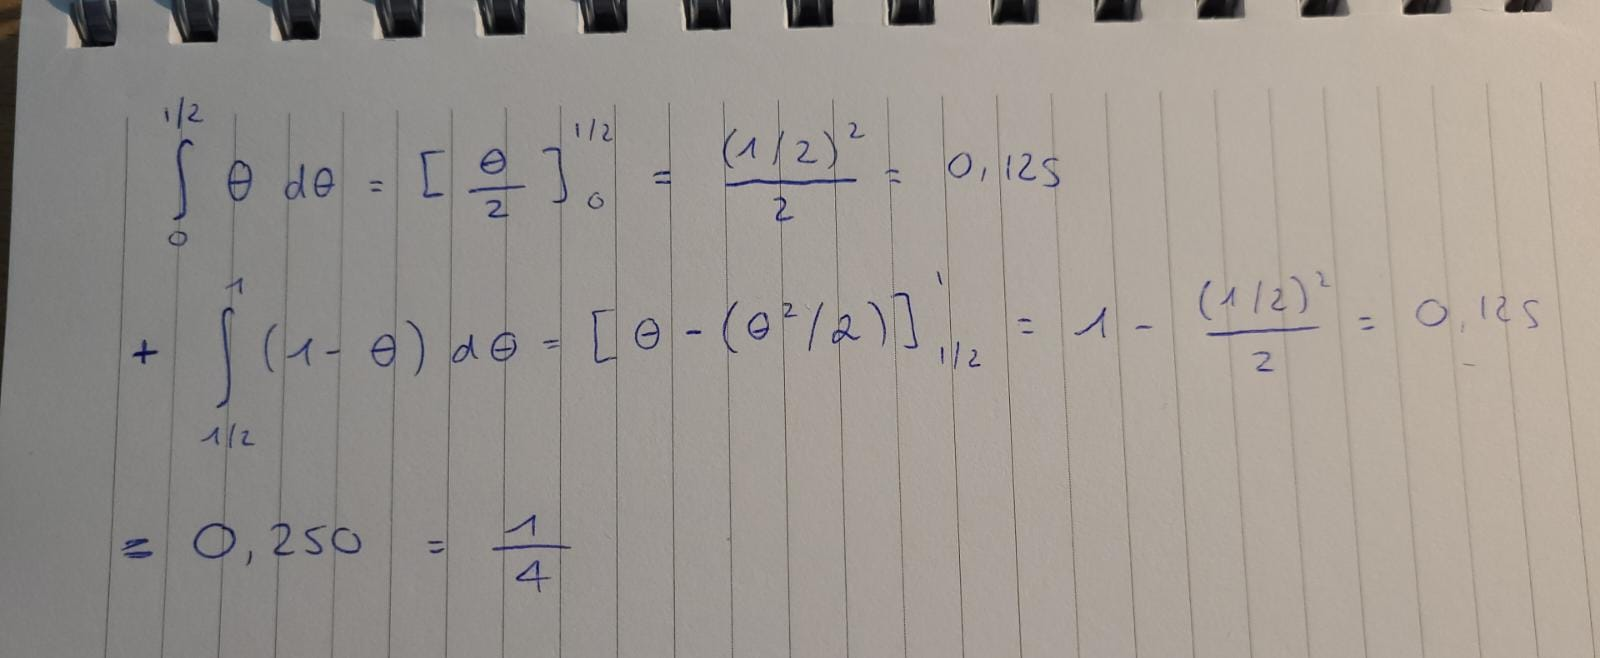

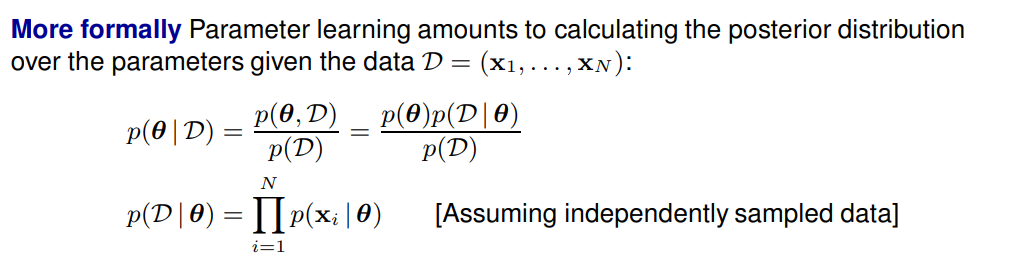

Where p(0) = f(0); P(D|0) = 1 (one instance up) and P(D) = 0.25, the normalization constant that we found previously.

As we see above, there are no changes in the distribution and the new data didn't give us any new information.

The problem with the distribution is that it's symmetric. Since the new data that we were given says that only one instance was tried and it resulted in up, the likelihood does not contribute to the posterior distribution, so the only key factor can be the prior distribution p(0), but since it's symmetric around 0.5, no changes are done.

P(0) = 0..1

P(D|0) = 1

P(D) = 0.25

## Exercise 5

Reconsider the thumbtack model above, but replace the prior distribution over $\theta$ and a Beta distribution chosing suitable hyperparameters of your own chosing.

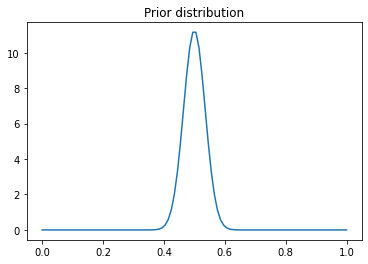

In [77]:
x = np.linspace(0,1,100)
y = beta.pdf(x,100,100)
plt.title("Prior distribution")
plt.plot(x,y)

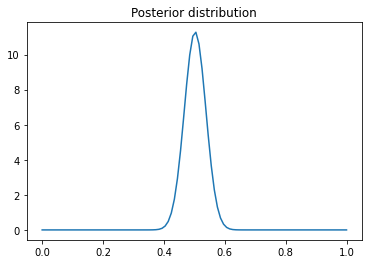

In [80]:
x = np.linspace(0,1,100)
y = beta.pdf(x,100 + 1,100)
plt.title("Posterior distribution")
plt.plot(x,y)

* What is the posterior distribution after seeing *pin up*? 

* How does the functional form compare to the posteror under the original prior distribution?

* How could you summarize the posterior distribution?

* Calculate the posterior predictive distribtion?

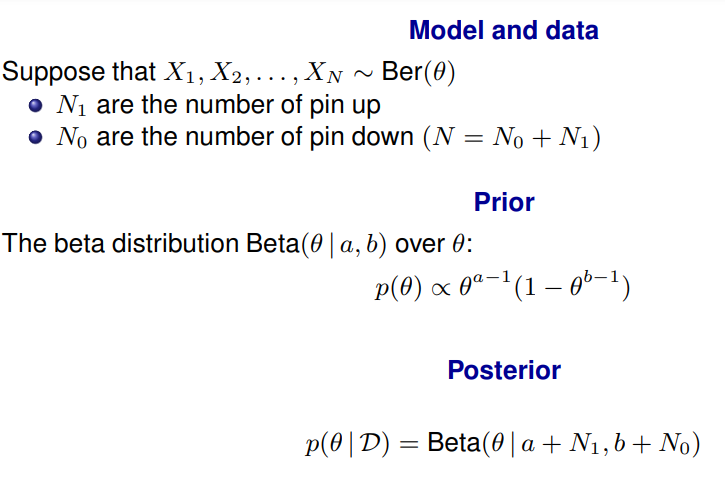

The hyperparameter a increases very slightly, since the Beta distribution is already very skewed, influenced by the high hyperparameters a and b. 

Regardless, only one example is not enough data to excessively consider a changed posterior distribution.

The functional form (the shape of the distribution) of the posterior distribution remains identical to the prior distribution
because a and b have quite big values.

The posterior distribution is modified significantly when enough new data has been collected in order to make a considerable change in the posterior distribution from the prior.

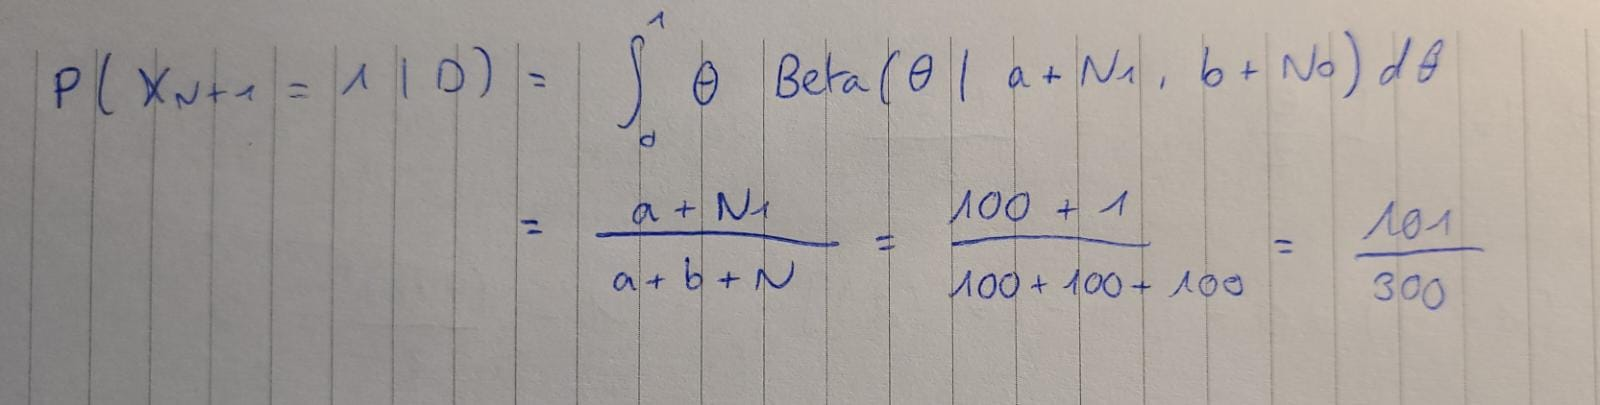

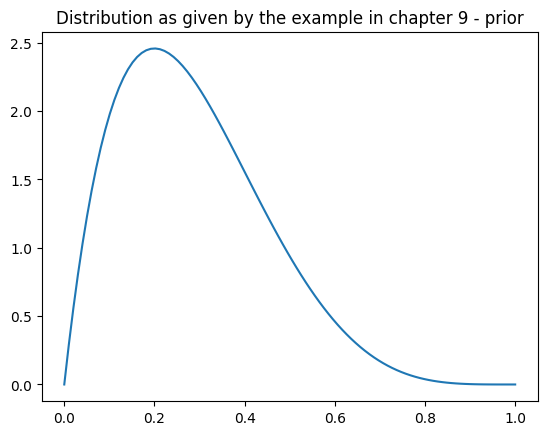

In [3]:
x = np.linspace(0,1,100)
y = beta.pdf(x,2,5)
plt.title("Distribution as given by the example in chapter 9 - prior")
plt.plot(x,y)

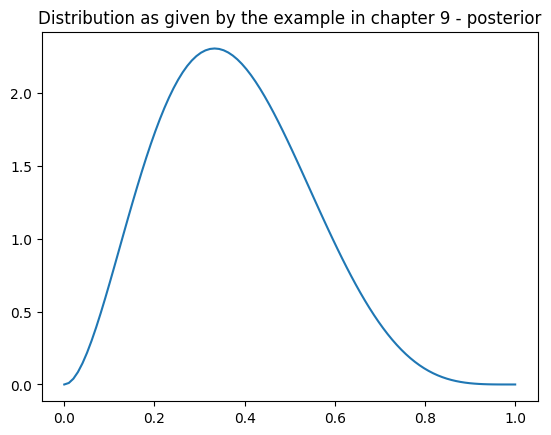

In [2]:
x = np.linspace(0,1,100)
y = beta.pdf(x,2+1,5)
plt.title("Distribution as given by the example in chapter 9 - posterior")
plt.plot(x,y)